In [53]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA

In [54]:
temperatures = pd.read_csv('../data/Annual precipitation in inches entire great Lakes 19001986.csv')
df = temperatures.set_index('Time').sort_index()
df.index = df.index.to_series().apply(lambda x: x + 1899)

In [55]:
df['MA_window_3'] = df['x'].rolling(window=3).mean()

In [56]:
arma_model = ARIMA(df['x'], order=(5,0,3))
arma_model_fit = arma_model.fit()
print(arma_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                   87
Model:                 ARIMA(5, 0, 3)   Log Likelihood                -201.795
Date:                Tue, 05 Dec 2023   AIC                            423.590
Time:                        20:03:05   BIC                            448.249
Sample:                             0   HQIC                           433.520
                                 - 87                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.6846      2.021     16.172      0.000      28.723      36.646
ar.L1          0.9849      0.244      4.030      0.000       0.506       1.464
ar.L2         -0.9204      0.202     -4.555      0.0

/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
X = df['x'].values
size = int(len(X) / 2)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arma_predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arma_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [58]:
print(len(train))
print(len(test))
print(len(arma_predictions))

43
44
44


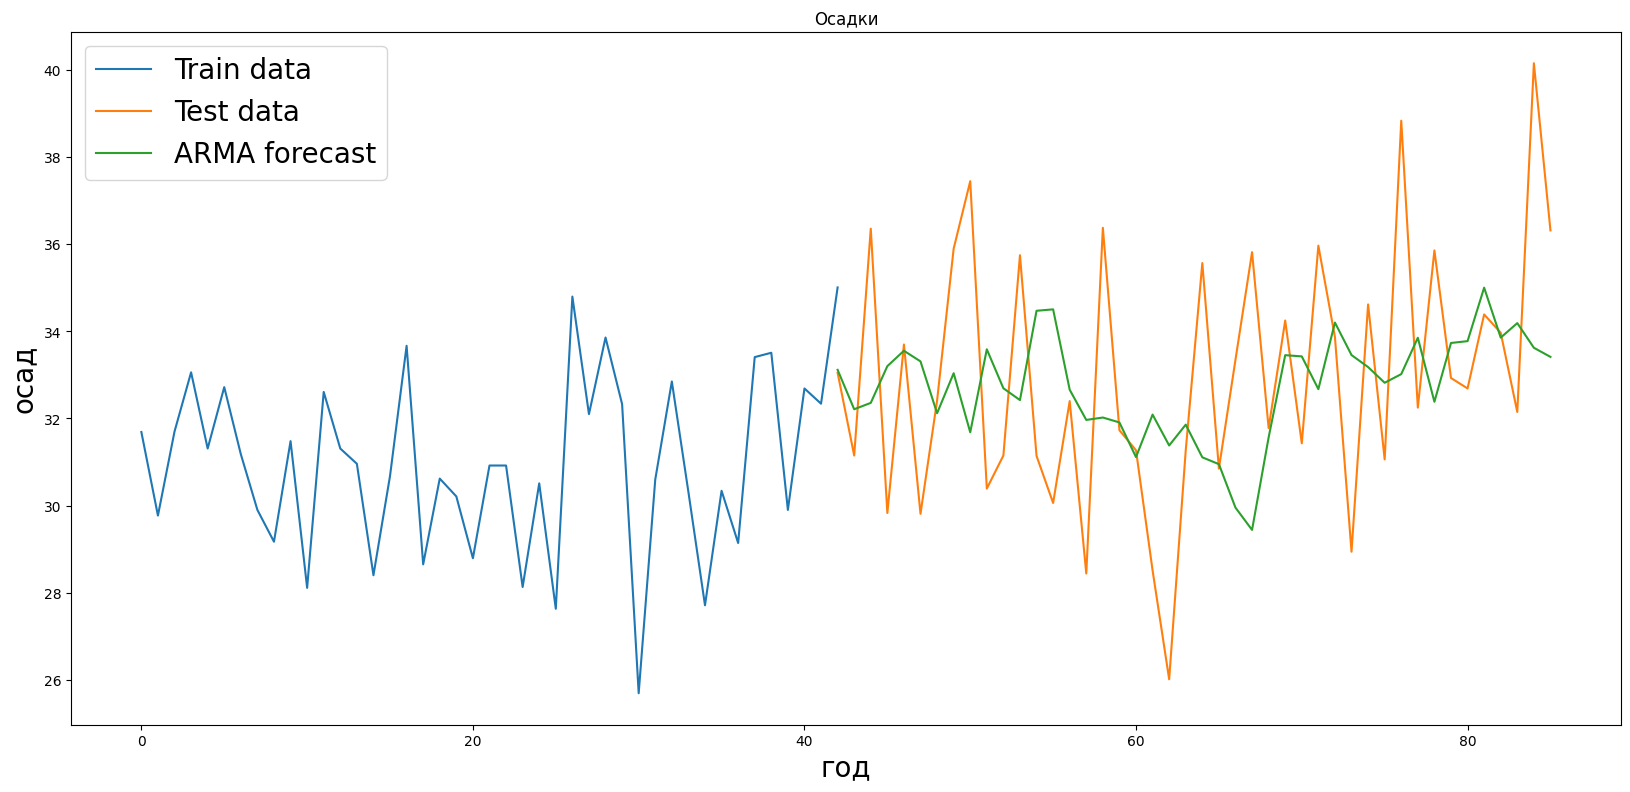

In [59]:
fig = plt.figure(figsize=(20, 9))
dur = len(arma_predictions)

plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], test[:dur], label='Test data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], arma_predictions, label='ARMA forecast')
plt.legend(fontsize="20")
plt.title('Осадки')
plt.ylabel('осад', fontsize="20")
plt.xlabel('год', fontsize="20")
plt.show()

In [60]:
from IPython.display import clear_output
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left')
    plt.show()

In [61]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

def calculate_smape(actual, predicted):
    return round(
        np.mean(np.abs(predicted - actual) / (np.abs(predicted) + np.abs(actual))), 19)

print("RMSE:", np.sqrt(mean_squared_error(test[size - 1:size - 1 + dur], arma_predictions[size - 1:size - 1 + dur])))
print("MAPE:", mean_absolute_percentage_error(test[size - 1:size - 1 + dur], arma_predictions[size - 1:size - 1 + dur]))
print("SMAPE:", calculate_smape(test[size - 1:size - 1 + dur], arma_predictions[size - 1:size - 1 + dur]))
print("MAE:", mean_absolute_error(test[size - 1:size - 1 + dur], arma_predictions[size - 1:size - 1 + dur]))

RMSE: 5.057217296328794
MAPE: 0.12135816925511414
SMAPE: 0.06511559765419721
MAE: 4.720182206257622


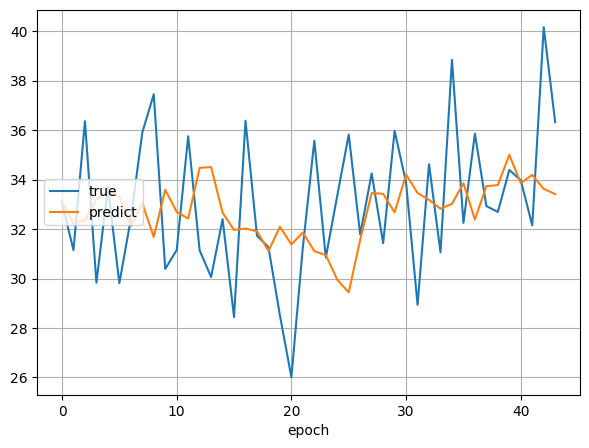

In [62]:
series = df["x"]

size = int(series.shape[0] * 0.5)
train, test = series[:size], series[size:len(series)]
history = [x for x in train.values]
predictions = []

val = {"true":[], "predict":[]}
for t in test.values:
    model = ARIMA(history, order=(5,1,0)).fit()
    output = model.forecast()
    yhat = output[0]
    predictions.append(yhat)
    val["predict"].append(yhat)
    val["true"].append(t)
    history.append(t)
    live_plot(val)

In [63]:
arima_model = ARIMA(df['x'], order=(10,2,10))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packa

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                   87
Model:               ARIMA(10, 2, 10)   Log Likelihood                -199.885
Date:                Tue, 05 Dec 2023   AIC                            441.769
Time:                        20:03:11   BIC                            493.065
Sample:                             0   HQIC                           462.402
                                 - 87                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6130      0.476     -3.391      0.001      -2.545      -0.681
ar.L2         -1.8537      0.687     -2.699      0.007      -3.200      -0.508
ar.L3         -2.0703      0.932     -2.222      0.0

/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Time'>

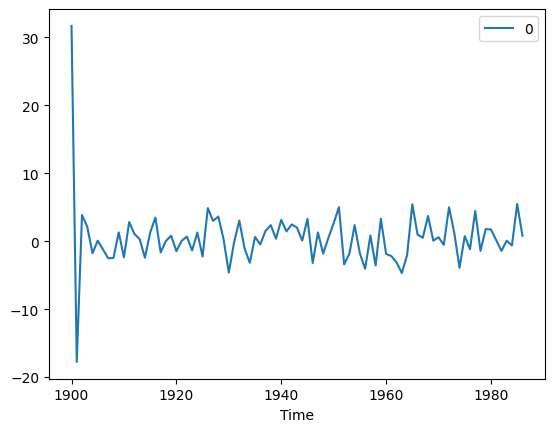

In [64]:
arima_residuals = pd.DataFrame(arima_model_fit.resid)
arima_residuals.plot()

In [65]:
output = arima_model_fit.forecast()

/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [66]:
X = df['x'].values
size = int(len(X) / 2)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
arima_predictions = list()
# walk-forward validation
for t in range(len(test)):
    arima_model = ARIMA(history, order=(10,2,5))
    arima_model_fit = arima_model.fit()
    output = arima_model_fit.forecast()
    yhat = output[0]
    arima_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/david/TimeSeries/HW4/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization f

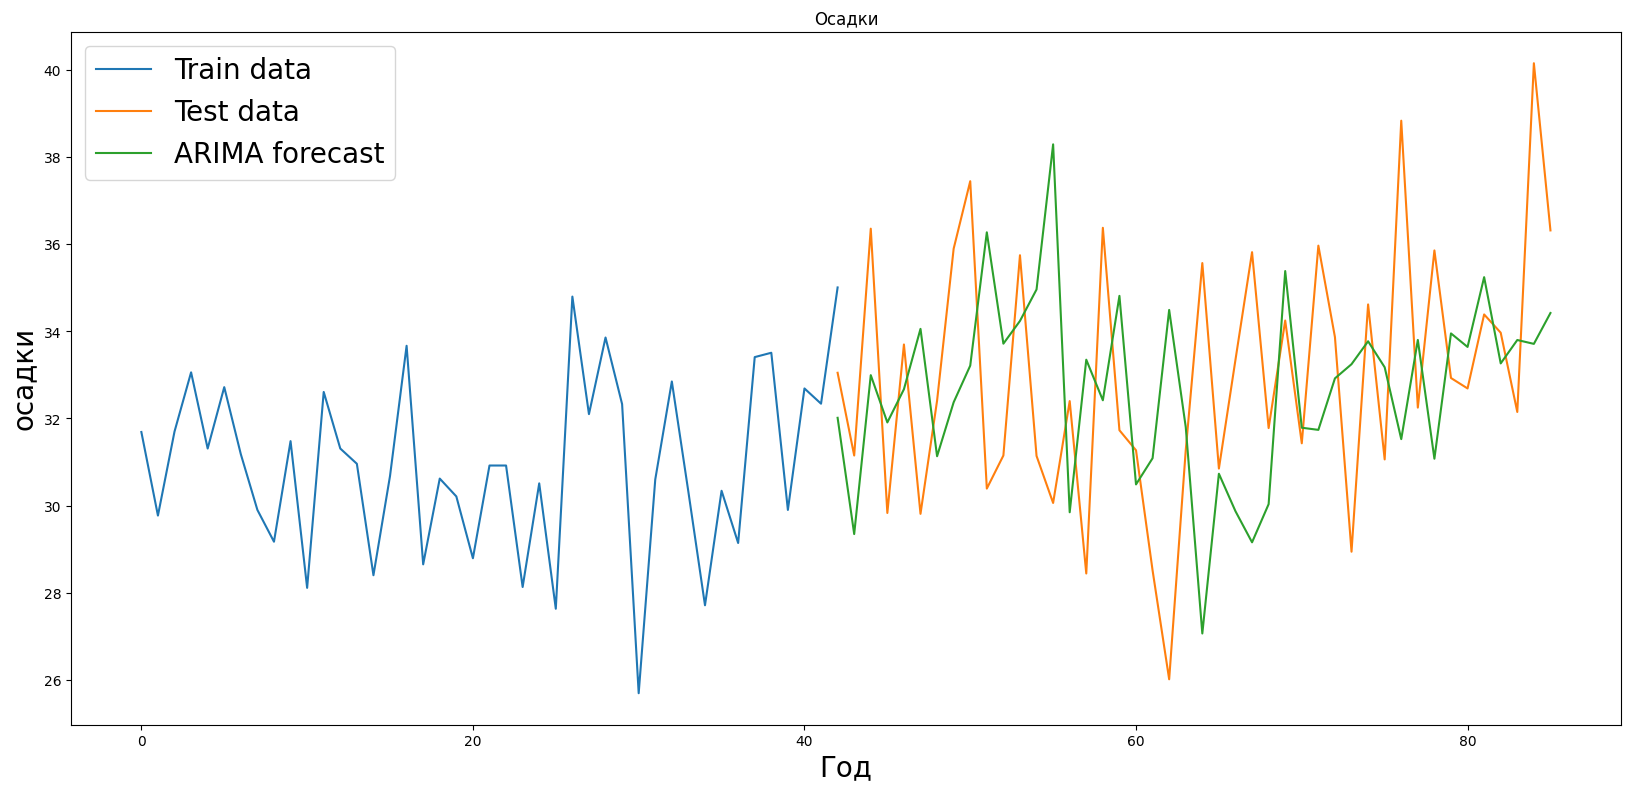

In [67]:
fig = plt.figure(figsize=(20, 9))
plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, len(X) - 1)], test, label='Test data')
plt.plot([i for i in range(size - 1, len(X) - 1)], arima_predictions, label='ARIMA forecast')
plt.legend(fontsize="20")
plt.title('Осадки')
plt.ylabel('осадки', fontsize="20")
plt.xlabel('Год', fontsize="20")
plt.show()

In [68]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np

def calculate_smape(actual, predicted):
    return round(
        np.mean(np.abs(predicted - actual) / ((np.abs(predicted) + np.abs(actual)))), 19)

print("RMSE:", np.sqrt(mean_squared_error(test[size - 1:len(X) - 1], arima_predictions[size - 1:len(X) - 1])))
print("MAPE:", mean_absolute_percentage_error(test[size - 1:len(X) - 1], arima_predictions[size - 1:len(X) - 1]))
print("SMAPE:", calculate_smape(test[size - 1:len(X) - 1], arima_predictions[size - 1:len(X) - 1]))
print("MAE:", mean_absolute_error(test[size - 1:len(X) - 1], arima_predictions[size - 1:len(X) - 1]))

RMSE: 4.751367849085033
MAPE: 0.10636899795960203
SMAPE: 0.05703611313848709
MAE: 4.171504825523936


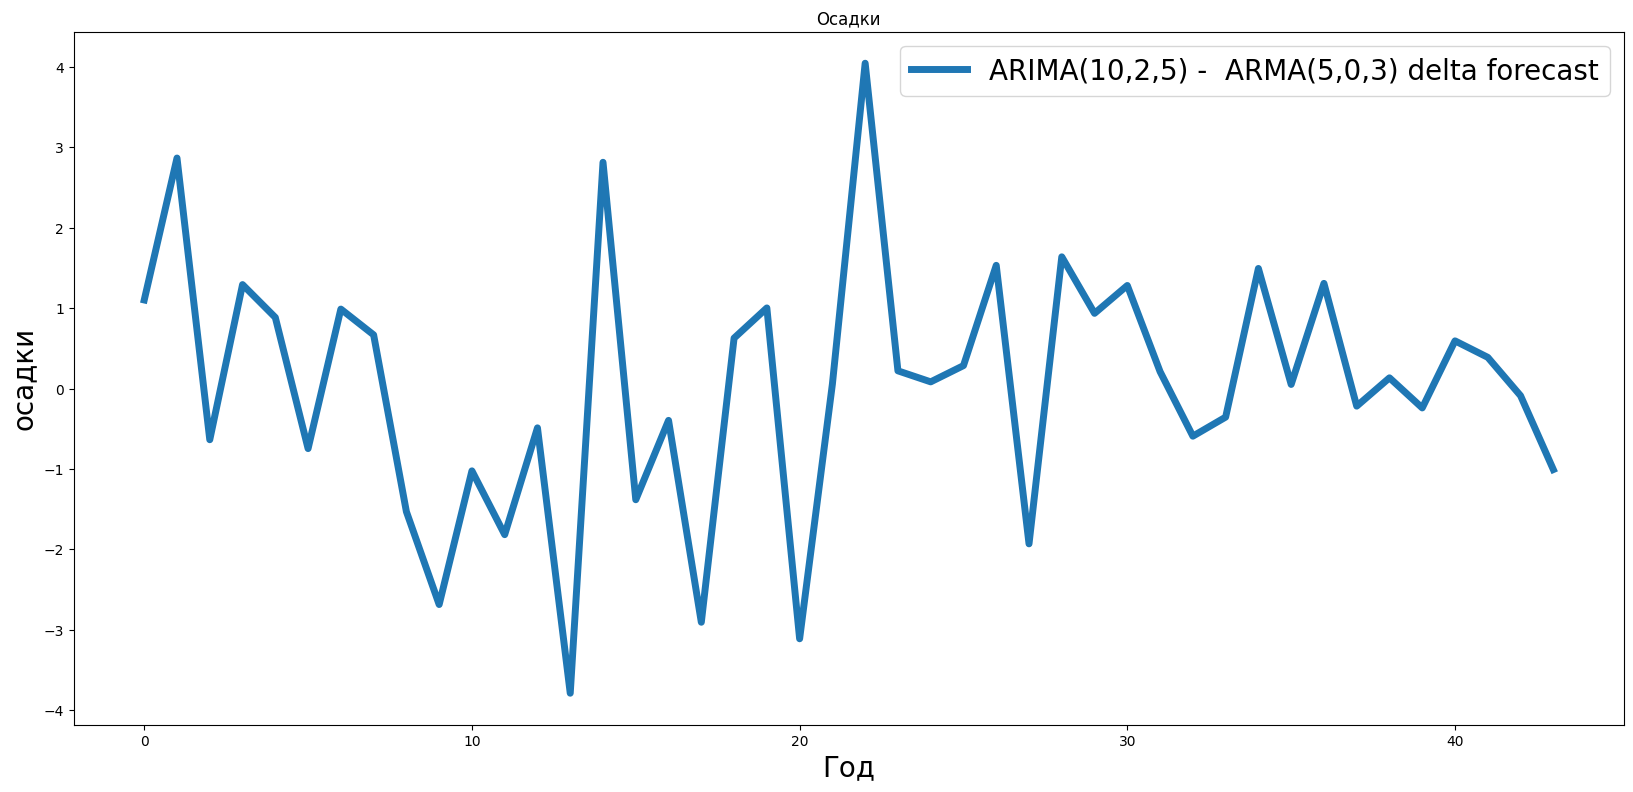

In [69]:
fig = plt.figure(figsize=(20, 9))

delta = []

for i in range(len(arima_predictions)):
    delta.append(arma_predictions[i] - arima_predictions[i])

plt.plot(delta, label='ARIMA(10,2,5) -  ARMA(5,0,3) delta forecast', linewidth=5)
plt.legend(fontsize="20")
plt.title('Осадки')
plt.ylabel('осадки', fontsize="20")
plt.xlabel('Год', fontsize="20")
plt.show()

<Axes: xlabel='Time'>

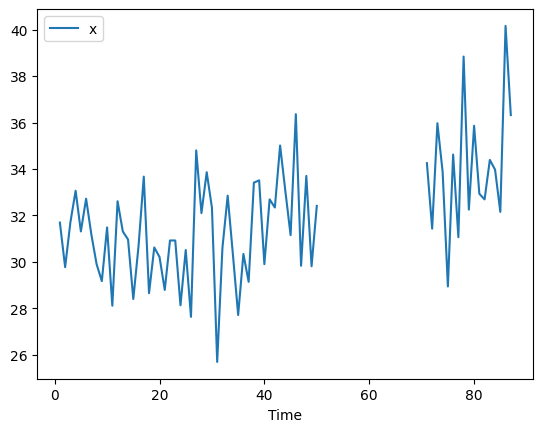

In [70]:
temperatures = pd.read_csv('../data/Annual precipitation in inches entire great Lakes 19001986.csv')
df = temperatures.set_index('Time').sort_index()
df.index = df.index.to_series()

df["x"][50:70] = np.nan

df.plot()

<Axes: title={'center': 'среднее из предыдущего и последующего'}, xlabel='Time'>

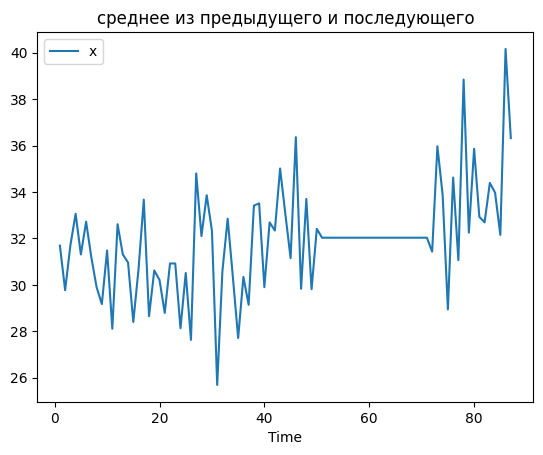

In [71]:
new_value = (df["x"][71] + df["x"][49])/2

df["x"][50:71] = new_value

df.plot(title="среднее из предыдущего и последующего")

<Axes: title={'center': 'Последующее значение'}, xlabel='Time'>

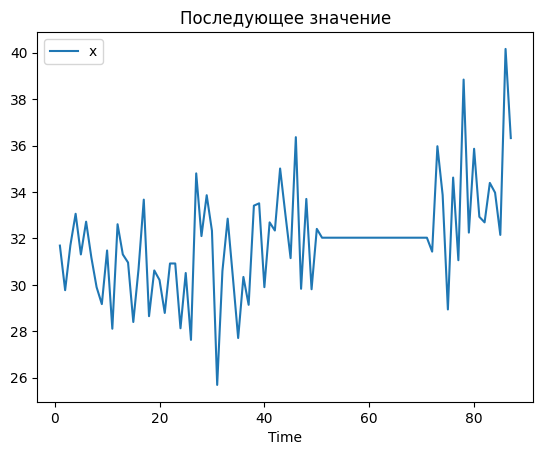

In [72]:
new_value = df["x"][71]

df["x"][50:71] = new_value

df.plot(title='Последующее значение')

<Axes: title={'center': 'Предыдущее значение'}, xlabel='Time'>

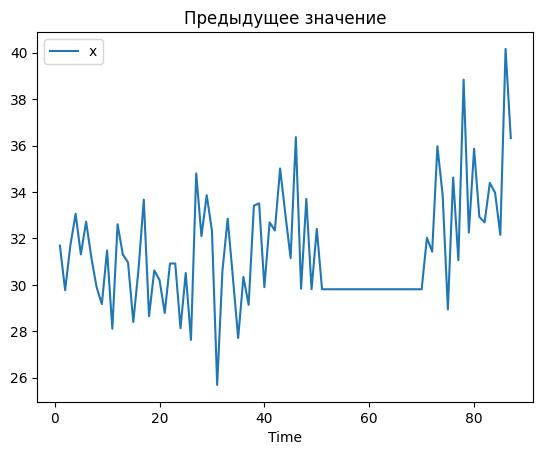

In [73]:
new_value = df["x"][49]

df["x"][50:70] = new_value

df.plot(title='Предыдущее значение')

<Axes: title={'center': 'медиана'}, xlabel='Time'>

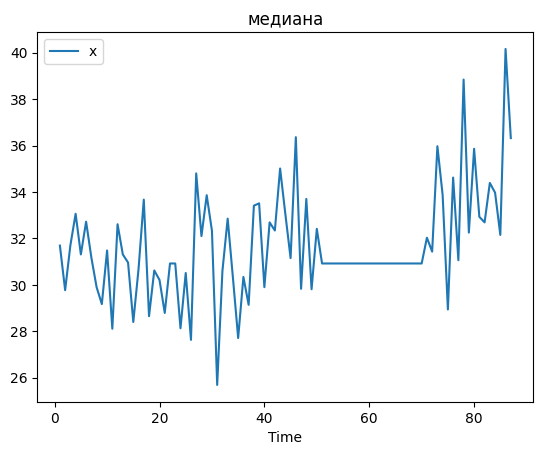

In [74]:
new_value = df["x"].median()

df["x"][50:70] = new_value

df.plot(title='медиана')

<Axes: title={'center': 'среднее'}, xlabel='Time'>

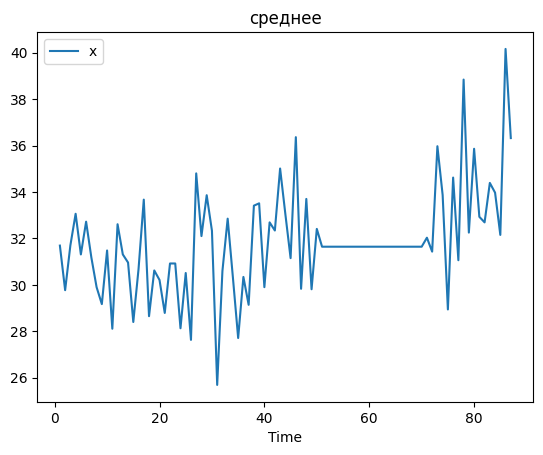

In [75]:
new_value = df["x"].mean()

df["x"][50:70] = new_value

df.plot(title='среднее')

<Axes: title={'center': 'zero'}, xlabel='Time'>

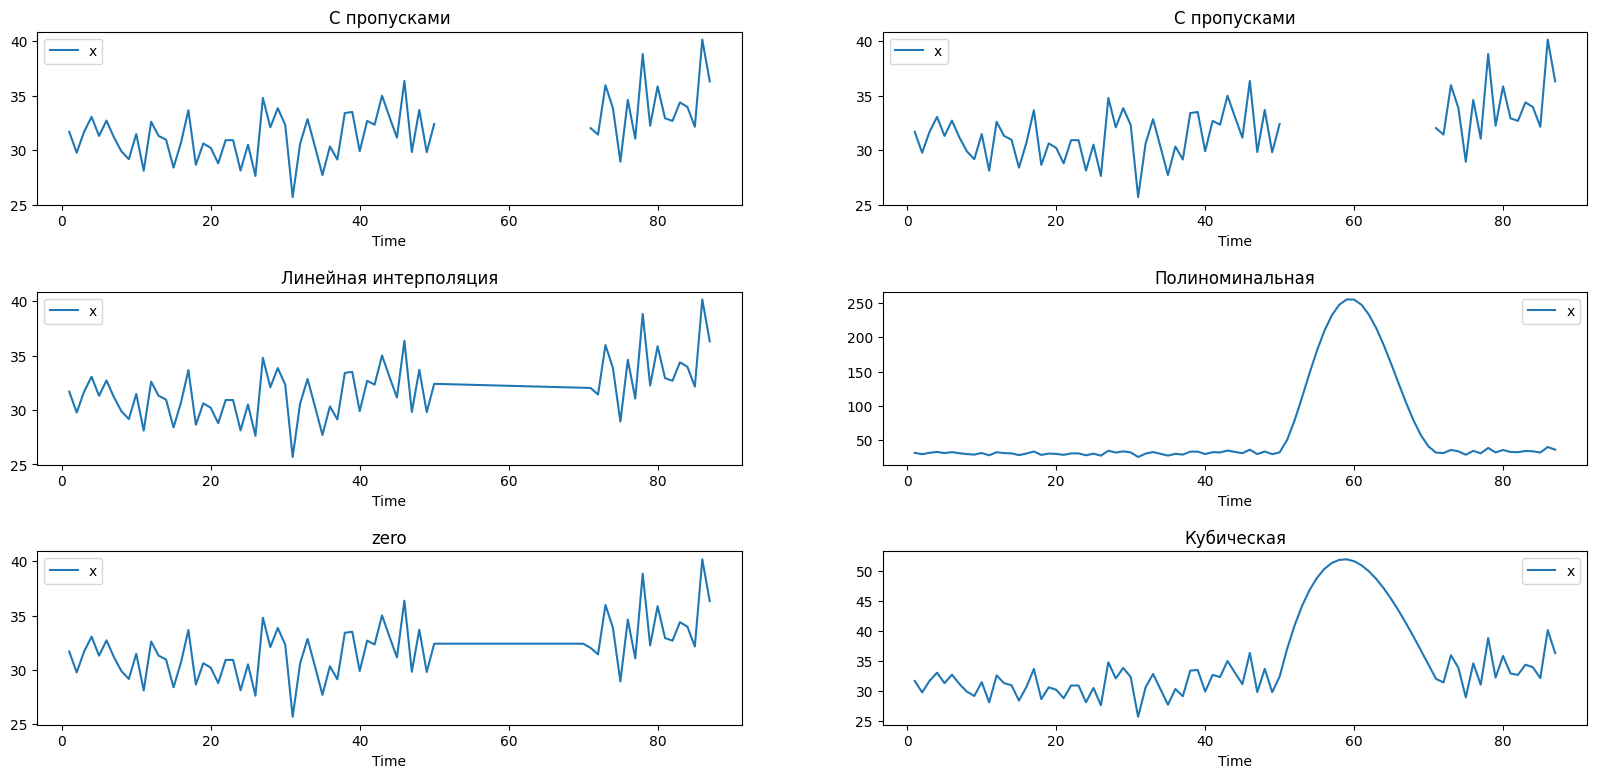

In [76]:
df["x"][50:70] = np.nan

lin_df = df.interpolate(method="linear")

cub_df = df.interpolate(method="cubic")

pol_df = df.interpolate(method="polynomial", order=5)

zero_df = df.interpolate(method="zero")


fig = plt.figure(figsize=(20, 9))
layout = (3, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

original_ax = plt.subplot2grid(layout, (0, 0))
lin_ax = plt.subplot2grid(layout, (1, 0))
cub_ax = plt.subplot2grid(layout, (2, 1))

pol_ax = plt.subplot2grid(layout, (1, 1))
zero_ax = plt.subplot2grid(layout, (2, 0))

df.plot(title="С пропусками", ax = original_ax)
df.plot(title="С пропусками", ax = plt.subplot2grid(layout, (0, 1)))
lin_df.plot(title="Линейная интерполяция", ax = lin_ax)
cub_df.plot(title="Кубическая", ax = cub_ax)
pol_df.plot(title="Полиноминальная", ax = pol_ax)
zero_df.plot(title="zero", ax=zero_ax)

In [77]:
import seaborn as sns

<Axes: >

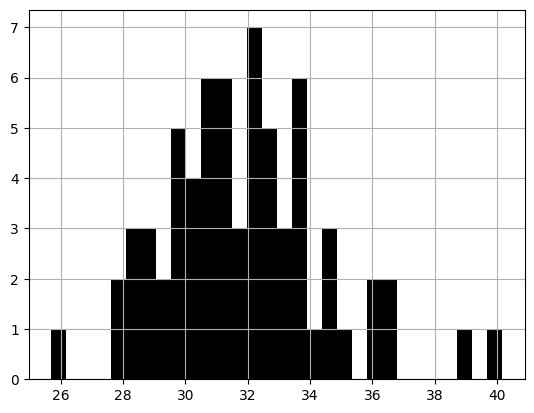

In [78]:
df["x"].hist(bins=30, color="black")

Text(0.5, 1.0, 'Осадки')

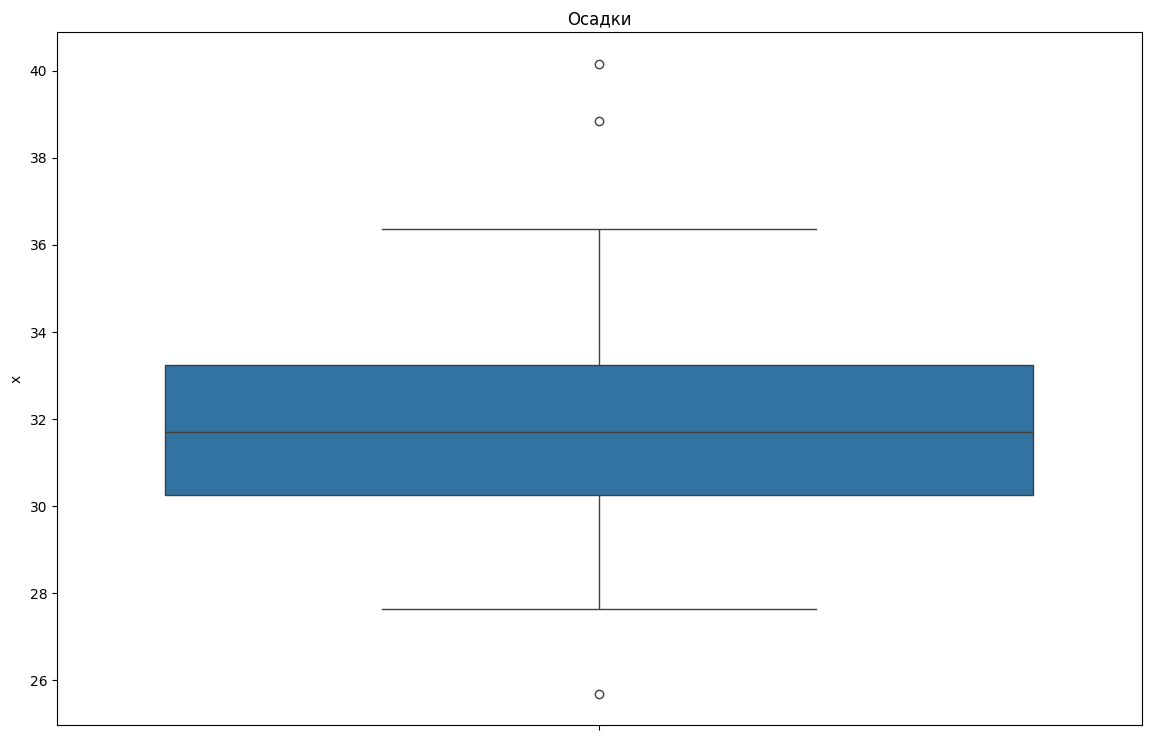

In [79]:
fig = plt.figure(figsize=(14, 9))

sns.boxplot(df.x).set_title('Осадки')

In [80]:
from sklearn import preprocessing, svm

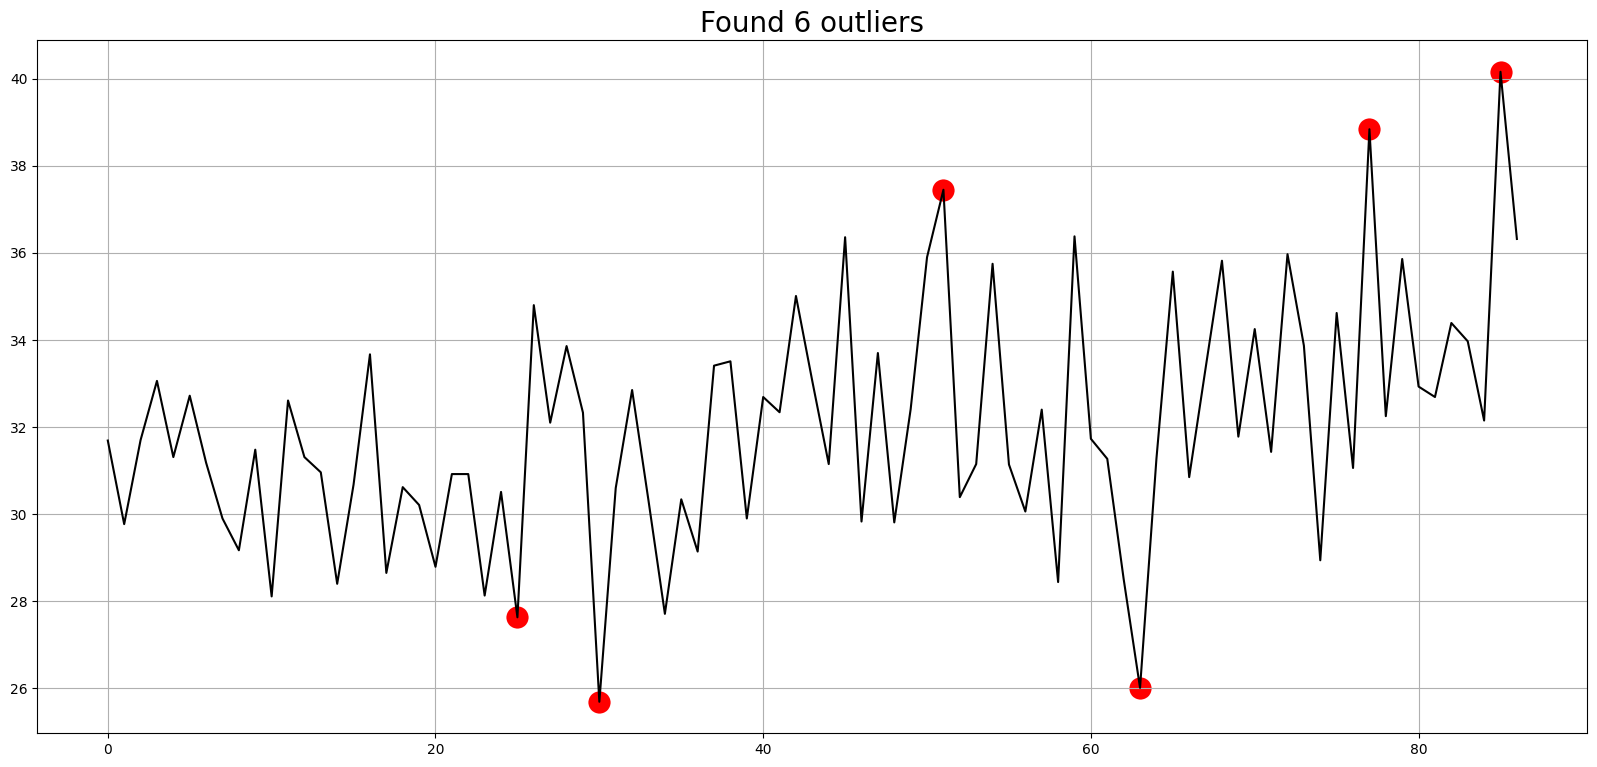

In [81]:
temperatures = pd.read_csv('../data/Annual precipitation in inches entire great Lakes 19001986.csv')
df = temperatures.set_index('Time').sort_index()
df.index = df.index.to_series().apply(lambda x: x + 1899)


scaler = preprocessing.StandardScaler()
perc = 0.05

local_df = df["x"]

ts_scaled = scaler.fit_transform(local_df.values.reshape(-1,1))
model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
model.fit(ts_scaled)
## dtf output
dtf_outliers =local_df.to_frame(name="ts")
dtf_outliers["index"] = range(len(local_df))
dtf_outliers["outlier"] = model.predict(ts_scaled)
dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                                            x: 1 if x==-1 else 0)
## plot
fig, ax = plt.subplots(figsize=(20, 9))
ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
        color="black")
ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
           y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
           color='red', linewidths=10)
plt.title(f"Found {sum(dtf_outliers['outlier']==1)} outliers", fontdict={'fontsize': 20})
ax.grid(True)
plt.show()

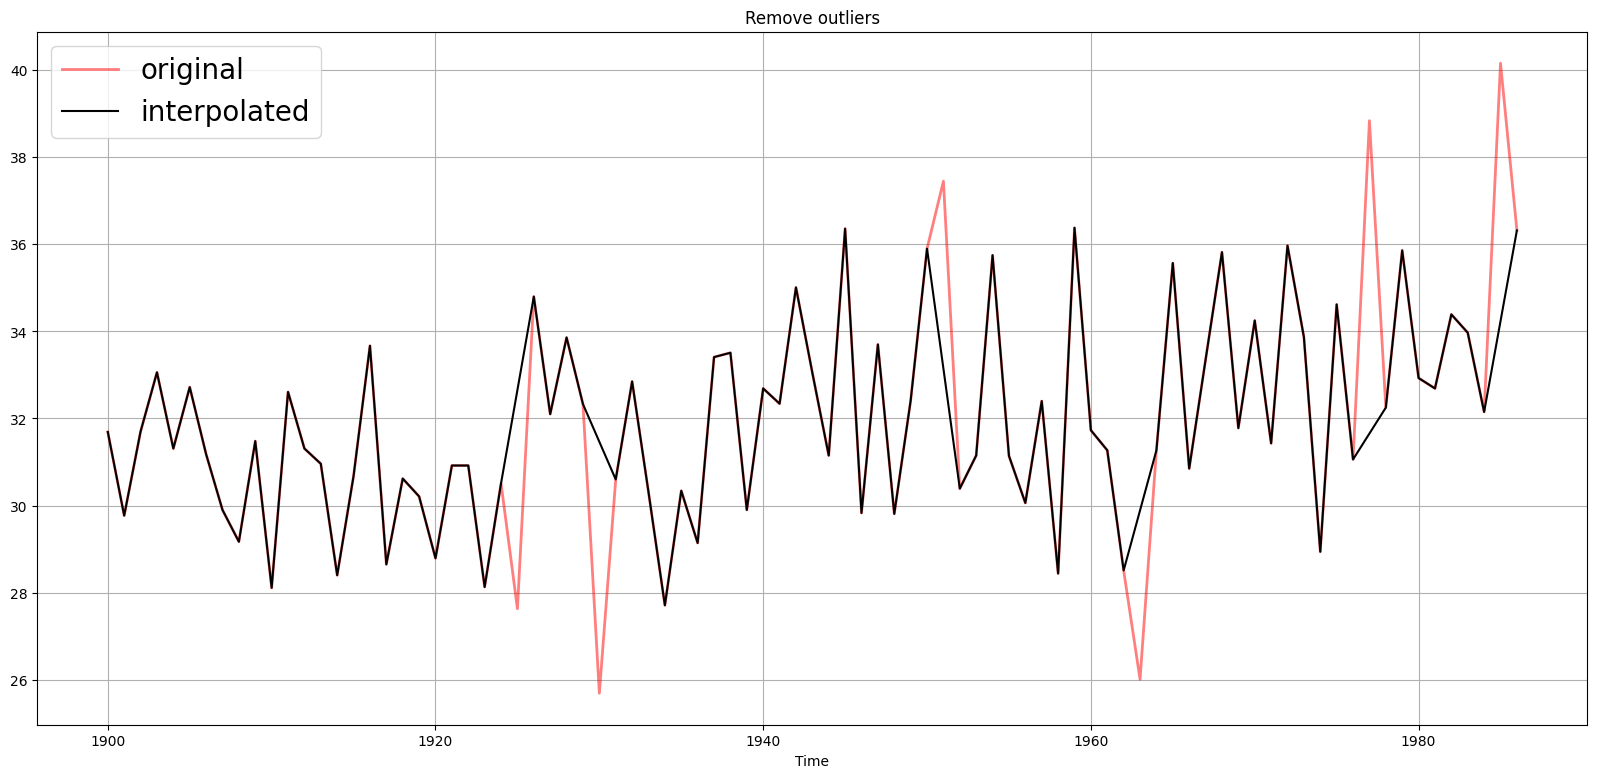

In [82]:
outliers_idx = dtf_outliers[dtf_outliers["outlier"]==1].index

ts_clean = local_df.copy()
ts_clean.loc[outliers_idx] = np.nan
ts_clean = ts_clean.interpolate(method="linear")
ax = local_df.plot(figsize=(20, 9), color="red", alpha=0.5,
             title="Remove outliers", label="original", legend=True, linewidth=2)
ts_clean.plot(ax=ax, grid=True, color="black",
              label="interpolated", legend=True)
plt.legend(fontsize="20")
plt.show()